# (1) Glass

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv("D:\Assignment\KNN\glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
#Checking for duplicate records
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df[df['RI']==1.52213]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
# Droping duplicate Records
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [11]:
# Check for null value
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Feature Scaling

In [12]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [13]:
df.iloc[:, :-1].head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [14]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
sc = StandardScaler()

In [16]:
x = sc.fit_transform(x)

In [17]:
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [18]:
x = pd.DataFrame(x, columns=df.columns[:-1])
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


## Split the Data

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=5)

In [20]:
xtrain

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
39,-0.138060,-0.753716,0.569881,-0.665947,0.485547,0.216568,-0.129406,-0.353808,-0.588301
56,-0.035609,-0.655525,0.555995,-0.322346,0.381944,0.155186,-0.368417,-0.353808,-0.588301
40,-0.263645,-0.851906,0.514337,-0.504252,0.705704,0.139840,-0.220793,-0.353808,-0.588301
51,-0.088487,0.031808,0.132471,-0.524464,0.239491,0.078457,0.053367,-0.353808,-0.588301
159,-0.009170,-0.090930,0.458793,0.182950,-0.667035,0.093803,0.025248,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
144,0.013964,-0.680073,0.687912,-0.423405,-0.110169,0.185877,-0.192674,-0.353808,3.006604
118,-0.604046,0.191368,0.618482,0.041467,-0.265574,0.216568,-0.698814,-0.353808,-0.588301
189,-0.732936,0.584130,-0.624316,0.688246,0.576200,-0.765554,-0.199704,1.175140,-0.588301
206,-0.012475,1.210094,-1.860172,0.748882,0.265391,1.398185,-1.746243,5.440099,-0.588301


## Model Building

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

## Model Testing

In [23]:
ypred = knn.predict(xtest)

In [24]:
ypred

array([1, 2, 2, 1, 2, 7, 7, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 7, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 7, 2, 2, 5, 1, 1, 7, 1, 6, 2, 2, 1, 2, 1, 1, 2],
      dtype=int64)

In [25]:
print(ytest[:30].values)
print(ypred[:30])

[1 1 2 2 1 7 7 1 1 3 7 1 2 2 1 1 2 7 2 2 1 2 2 2 1 3 5 7 2 1]
[1 2 2 1 2 7 7 1 1 1 2 1 2 2 1 1 2 7 2 1 1 2 2 2 1 1 2 7 2 2]


In [26]:
accuracy_score(ytest, ypred)

0.7441860465116279

In [27]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.72      0.81      0.76        16
           2       0.67      0.86      0.75        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.71      0.83         7

    accuracy                           0.74        43
   macro avg       0.73      0.65      0.67        43
weighted avg       0.72      0.74      0.72        43



In [28]:
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))

0.7823529411764706
0.7441860465116279


- Over Fit data

## Improving the model

In [29]:
train_accuracy = []
test_accuracy = []

# Selecting the best value of n_neighbors(K) value to get best generalized model

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    train_accuracy.append(knn.score(xtrain, ytrain))
    test_accuracy.append(knn.score(xtest, ytest))

In [30]:
Accuracy = pd.DataFrame({
    "Train_Accuracy": train_accuracy,
    "Test_Accuracy": test_accuracy
})
Accuracy

,Train_Accuracy,Test_Accuracy
0,1.000000,0.720930
1,0.823529,0.767442
2,0.829412,0.720930
3,0.782353,0.790698
4,0.782353,0.744186
5,0.729412,0.720930
6,0.682353,0.744186
7,0.682353,0.720930
8,0.694118,0.720930
9,0.682353,0.697674


Text(0, 0.5, 'Accuracy')

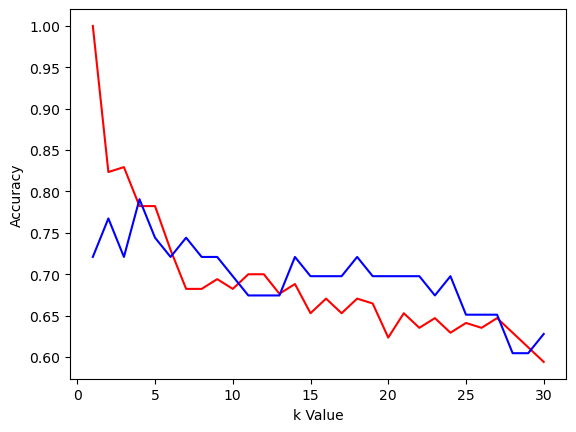

In [31]:
# ploting line graph to find best n_neighbors(K) value
plt.plot(range(1, 31), train_accuracy, color='r')
plt.plot(range(1, 31), test_accuracy, color='b')
plt.xlabel('k Value')
plt.ylabel('Accuracy')

In [32]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

print((knn.score(xtrain, ytrain)))
print(knn.score(xtest, ytest))

0.7294117647058823
0.7209302325581395


---------------------------------------------------------------------------------------------------------------------------

# (2) Zoo

In [33]:
df = pd.read_csv("D:\Assignment\KNN\Zoo.csv")

In [34]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [37]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [38]:
# Check for Null value
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

## Feature Scaling

In [39]:
sc = StandardScaler()

In [40]:
df.shape

(101, 18)

In [41]:
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [42]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [44]:
x = sc.fit_transform(x)

In [45]:
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [46]:
x = pd.DataFrame(x, columns=df.columns[1:-1])

In [47]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


### Spliting the Data

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size=0.2,
                                                random_state=3)

In [49]:
xtrain

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
12,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
8,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
80,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,-1.404435,0.588784,-0.384353,-0.878595
87,-0.861034,2.012461,0.843721,-0.826640,1.791182,1.343710,-1.115547,-1.234909,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
72,-0.861034,-0.496904,-1.185227,-0.826640,-0.558291,-0.744208,0.896421,-1.234909,-2.14735,0.512348,3.409545,-0.449868,2.549514,0.588784,-0.384353,-0.878595
56,-0.861034,2.012461,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180


## Model Building

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

## Model Testing

In [52]:
ypred = knn.predict(xtest)

In [53]:
print(ytest[:30].values)
print(ypred[:30])

[1 1 1 1 4 1 7 6 5 7 2 1 6 1 4 3 4 2 2 1 1]
[1 1 1 1 4 1 6 6 5 7 2 1 6 1 4 4 4 2 2 1 1]


In [54]:
accuracy_score(ytest, ypred)

0.9047619047619048

In [55]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.90        21
   macro avg       0.77      0.79      0.76        21
weighted avg       0.88      0.90      0.88        21



In [56]:
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))

0.95
0.9047619047619048


## Improving model

In [57]:
train_accuracy = []
test_accuracy = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    train_accuracy.append(knn.score(xtrain, ytrain))
    test_accuracy.append(knn.score(xtest, ytest))

In [58]:
Accuracy = pd.DataFrame({
    "Train_Accuracy": train_accuracy,
    "Test_Accuracy": test_accuracy
})
Accuracy

,Train_Accuracy,Test_Accuracy
0,1.0000,1.000000
1,0.9375,0.952381
2,0.9500,0.952381
3,0.9500,0.904762
4,0.9500,0.904762
5,0.9375,0.904762
6,0.9500,0.904762
7,0.9250,0.904762
8,0.9250,0.904762
9,0.9125,0.904762


Text(0, 0.5, 'Accuracy')

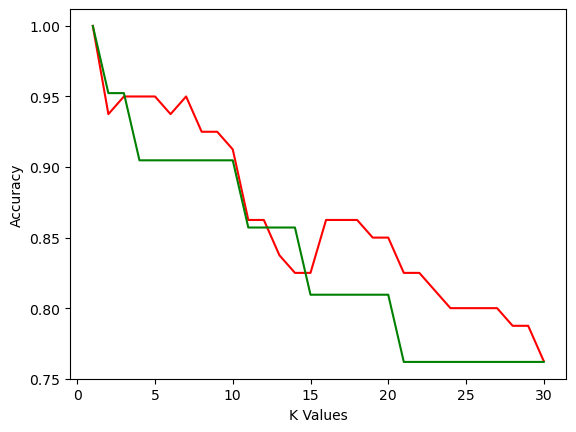

In [59]:
plt.plot(range(1, 31), train_accuracy, color='r')
plt.plot(range(1, 31),test_accuracy, color='g')
plt.xlabel('K Values')
plt.ylabel('Accuracy')

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))

0.95
0.9523809523809523
